In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [183]:
df = pd.read_csv('dataset/Animal_Shelter_Intake_and_Outcome.csv', sep=';')

Name - Name of the animal. Animal names with an asterisk before them were given by shelter staff.<br>
Type - Type of animal<br>
Breed - Breed of animal<br>
Color - Color of animal, Black, Chocolate, White….
<br>Sex - Male, Female, Neutered Male, Spayed Female
<br>Size - Large, medium, small, toy
<br>Date Of Birth - Approximate date of birth.
<br>Impound Number - Animal impound number
<br>Kennel Number - Kennel number indicating its current location.
<br>Animal ID - Unique ID
<br>Intake Date	- Date animal was taken into the shelter
<br>Outcome Date - Date animal left the shelter
<br>Days in Shelter	- Number of days the animal was in the shelter
<br>Intake Type	- Reason for intake
<br>Intake Subtype - Sub reason for intake
<br>Outcome Type - Reason for release from shelter
<br>Outcome Subtype	- Sub reason for release from shelter
<br>Intake Condition - Animals condition at intake
<br>Outcome Condition - Animals condition at release from shelter
<br>Intake Jurisdiction	- Jurisdiction responsible for animal intake
<br>Outcome Jurisdiction - Area animal went to.
<br>Outcome Zip Code - Zip code where animal went to.
<br>Location - Latitude, Longitude coordinates for outcome jurisdiction
<br>Count - Column for performing arithmetic and creating groups for views and visualizations

In [184]:
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,K22-043412,TRUCK,A396382,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,K23-044765,DS53,A417653,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
2,NaN,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,K23-044764,DS49,A417654,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
3,NaN,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,K23-044766,DS60,A417652,...,OVER THE COUNTER,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,K23-044756,DS62,A417644,...,FIELD,TRANSFER,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,"94951(38.29715, -122.66645)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,K19-033988,CA02,A392014,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,*HEALDSBURG,95448.0,"95448(38.61064, -122.86883)",1
25431,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,K18-028720,CA01,A374156,...,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.41483, -122.72707)",1
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,K14-010771,DS70,A293651,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,95476.0,"95476(38.29188, -122.45728)",1
25433,*NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,K20-036116,DS91,A398415,...,FIELD,TRANSFER,ROCKET DOG,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,94146.0,94146,1


In [185]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()

labeled_df = df.apply(encoder.fit_transform)
labeled_df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,5691,1,198,29,2,4,4846,24267,155,17687,...,3,5,63,3,1,11,10,458,470,1
1,6778,1,492,18,2,2,5791,25208,90,22727,...,20,7,235,3,1,9,8,392,400,1
2,6778,1,951,223,0,2,5791,25207,86,22728,...,20,7,235,3,1,9,8,392,400,1
3,6778,1,472,18,2,2,5791,25209,97,22726,...,20,7,235,3,1,9,8,392,400,1
4,3225,1,937,29,0,4,2246,25200,99,22719,...,3,7,235,3,1,9,8,392,400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,2931,0,408,191,2,4,4645,18172,4,16928,...,20,0,225,0,1,11,2,488,509,1
25431,1020,2,52,304,3,4,5012,14318,3,13740,...,20,7,88,0,1,11,8,461,476,1
25432,6023,1,743,269,2,1,5654,2388,107,1233,...,20,4,7,4,5,11,8,511,538,1
25433,1478,1,307,116,2,4,3371,19600,128,18043,...,3,7,192,0,1,11,9,277,278,1


## Correlation matrix

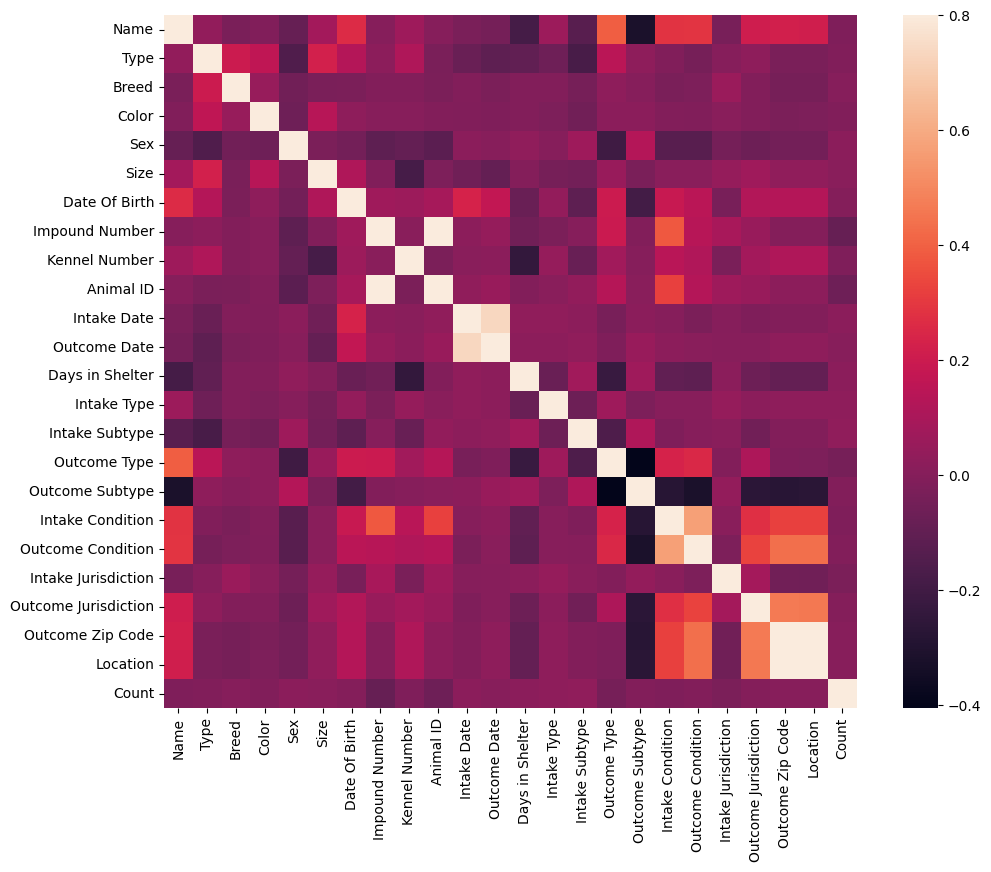

In [186]:
corrmat = labeled_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Dropping columns based on the correlation matrix

In [187]:
#df = df.drop('Outcome Zip Code', axis=1)
df = df.drop('Intake Date', axis=1)
df = df.drop('Intake Subtype', axis=1)
df = df.drop('Outcome Date', axis=1)
df = df.drop(['Impound Number', 'Animal ID'], axis=1)
#df = df.drop('Outcome Type', axis=1)
df = df.drop('Outcome Subtype', axis=1)
df = df.drop('Intake Jurisdiction', axis=1)
#df = df.drop('Name', axis=1)
#df = df.drop('Outcome Condition', axis=1)
#df = df.drop('Outcome Jurisdiction', axis=1)
df = df.drop('Count', axis=1)
# df.drop(df[df["Days in Shelter"] == "0"].index, inplace=True)
# df


## Location map

### Splitting location into latitude and longitude

In [188]:
import re

regex_string = r'\(([-+]?\d+\.\d+), ([-+]?\d+\.\d+)\)'

latitude = []
longitude = []

for i in range(len(df)):
    x = df['Location'][i]
    if '(' not in str(x):
        latitude.append(np.nan)
        longitude.append(np.nan)
    else:
        match = re.search(regex_string, df['Location'][i])
        if match:
            x = match[1]
            y = match[2]
            latitude.append(x)
            longitude.append(y)
        else:
            latitude.append(np.nan)
            longitude.append(np.nan)

In [189]:
latitude = pd.Series(latitude)
longitude = pd.Series(longitude)

df['Latitude'] = latitude
df['Longitude'] = longitude

df = df.drop(['Location'], axis=1)
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Outcome Jurisdiction,Outcome Zip Code,Latitude,Longitude
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,TRUCK,0,STRAY,RETURN TO OWNER,UNKNOWN,HEALTHY,SANTA ROSA,95404.0,38.43807,-122.71247
1,NaN,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MED,NaN,DS53,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,COUNTY,94951.0,38.29715,-122.66645
2,NaN,DOG,SIBERIAN HUSKY/MIX,RED,Female,MED,NaN,DS49,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,COUNTY,94951.0,38.29715,-122.66645
3,NaN,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MED,NaN,DS60,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,COUNTY,94951.0,38.29715,-122.66645
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,3,STRAY,TRANSFER,UNKNOWN,HEALTHY,COUNTY,94951.0,38.29715,-122.66645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,20,STRAY,ADOPTION,HEALTHY,HEALTHY,*HEALDSBURG,95448.0,38.61064,-122.86883
25431,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,112,STRAY,TRANSFER,HEALTHY,HEALTHY,COUNTY,95407.0,38.41483,-122.72707
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,21,STRAY,EUTHANIZE,UNTREATABLE,UNTREATABLE,COUNTY,95476.0,38.29188,-122.45728
25433,*NEWTON,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,49,STRAY,TRANSFER,HEALTHY,HEALTHY,OUT OF COUNTY,94146.0,NaN,NaN


### Showing locations on the map

c:\Users\CEM\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


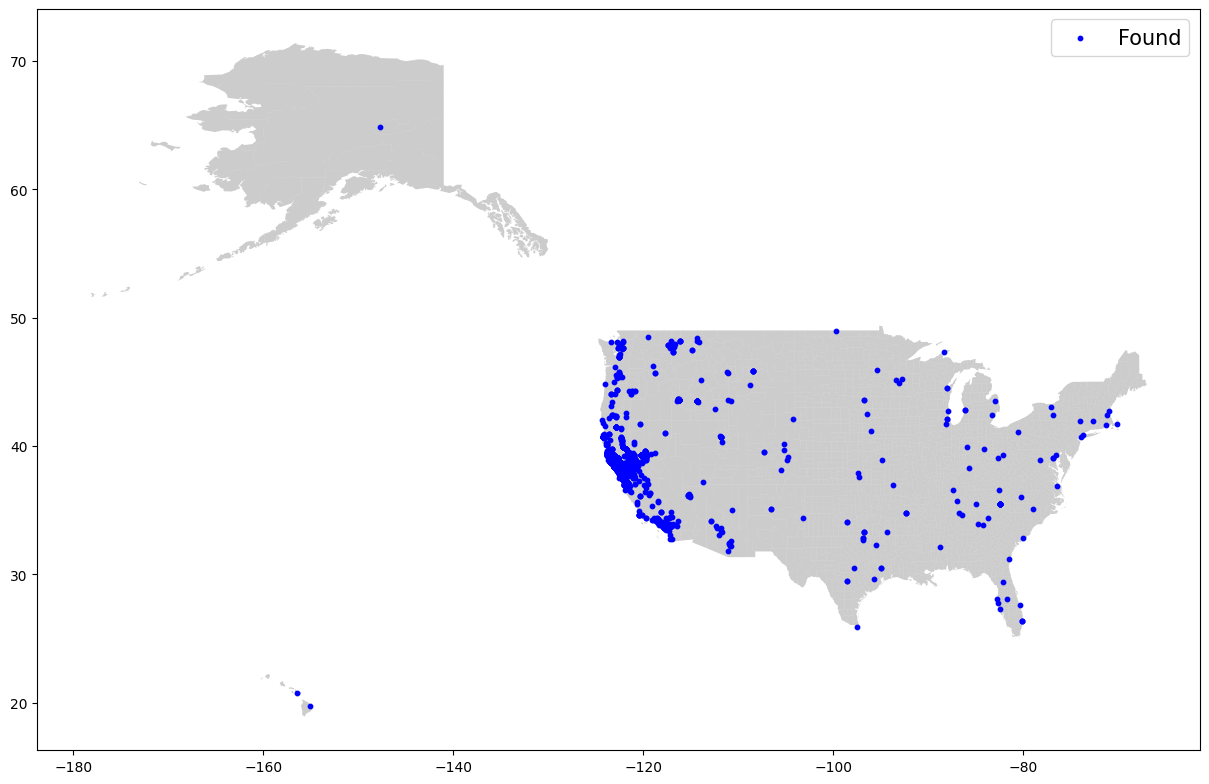

In [190]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

street_map = gpd.read_file('dataset/USA_Counties.shp')
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax=ax, 
            markersize=10, 
            color='blue', 
            marker='o', 
            label='Found')

plt.legend(prop={'size':15})

## Null check

In [191]:
df.isnull().sum()

Name                    6670
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      35
Date Of Birth           6329
Kennel Number             30
Days in Shelter            0
Intake Type                0
Outcome Type             217
Intake Condition           0
Outcome Condition        564
Outcome Jurisdiction    3668
Outcome Zip Code        3724
Latitude                4006
Longitude               4006
dtype: int64

## Names analysis

In [192]:
unique_names = df['Name'].unique().tolist()
unique_names[:10]

['RAZOR',
 nan,
 'CHLOE',
 'MAX',
 'OSO',
 'FELLA',
 'PUDGY',
 'LEXI',
 'KENJI',
 'SONOMA']

In [193]:
import re
for name in unique_names:
    if name is np.nan:
        continue
    else:
        if re.match("^[a-zA-Z0-9_]*$", name):
            continue
        else:
            print(name)

*TABITHA
*PEPPER
SIR DUNCAN NEPAL
*RYAN
*MICHAELA
*SQUID
*TED
*SPROUT
*JENNY
TURKEY VULTURE
*CHECKERS
*CODY
*LUZ
*GINNY
*CASHEW
*GRACE
*TWINKLES
*PHOENIX
*TUCKER
PIGGY PIGGY
*GEORGE
*MULAN
KITTY KITTY
*SPARKLE
*SHINE
*LILLY
*FREDDY
NINA BEAR
LITTLE BUDDY
*LUCKY
*BUTTERCUP
KITTY BOY
*MILA
*NALA
*SID
*BRIAN
*SPRECKLES
*KIT
*BILLY
*PIE
*SADIE
*SULLI
*CUTIE
*GALAPAGOS
COCO CHANEL
*CHANCE
*CLOWN
*PERSIMMON
*JULIETTE
*VIXEN
* ROBIN
*BOOTSIE
*ALVIE
*STELLA
*LLOYD
*HONEY
*ASTRO
*TANGO
*AVA
*SQUEAK
*TILLY
*OISHI
*APOLLO
*ZOOM
*MOCHA
*LONNIE
*LUCY
*MALCOLM
*SPROCKET
*BUTTERBALL
*PHILLIP
*LOCKET
*ROCKET
DESI LU
*LATTE
*CANDY
*WIDGET
*PRETZEL
*CHESS
*POCKET
*BEANS
*JOHNNY
*RADISH
PRINCE HENRY
*GLADYS
*KEANU
LOU DOG
*BASIL
*TAMMY
*PYRITE
*OBSIDIAN
*CELESTITE
*DOTTIE
*TURNER
*BETH
*KELLY
*MELVIN
*JOE
*MEG
*SLEEPY
*JUNE
*ONYX
*BAMBI
*SAPHIRA
*BITSY
*TOPAZ
*AGATE
*GALENA
*MOONSTONE
*HUCKLEBERRY
*MUNCHIE
*RUFUS
*CHAMP
*MELODY
EMMA LOU
*GERTRUDE
*GRAHAM
*VINCE
*PO BOY
*PAULA
BLUES CLUES
*WENDY
*JOKER
*R

In [194]:
df['Name'] = df['Name'].str.replace('*', '')
df['Name']

0          RAZOR
1            NaN
2            NaN
3            NaN
4          CHLOE
          ...   
25430       BUBA
25431    JESSICA
25432     SHINER
25433     NEWTON
25434        NaN
Name: Name, Length: 25435, dtype: object

In [195]:
df['Name'].isnull().sum()

6670

In [197]:
df["HasName"] = df["Name"].apply(lambda x: 0 if pd.isnull(x) else 1)

## Type analysis

In [98]:
unique_types = df['Type'].unique().tolist()
unique_types

['DOG', 'OTHER', 'CAT']

In [99]:
otherAnimals = df[df["Type"] == "OTHER"]
otherAnimals

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Outcome Date,...,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Count,Latitude,Longitude
5,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,TRUCK,03/15/2023,03/15/2023,...,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,1,NaN,NaN
12,NaN,OTHER,BAT,BLACK,Unknown,SMALL,NaN,EUTH,03/13/2023,03/13/2023,...,EUTHANIZE,FRA,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,1,NaN,NaN
14,SONOMA,OTHER,HORSE,BROWN/BLACK,Female,LARGE,NaN,CHANGE,11/15/2021,03/15/2023,...,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,1,38.43807,-122.71247
17,NaN,OTHER,BAT/MEX FREE-TAIL,GRAY,Unknown,SMALL,NaN,TRUCK,03/15/2023,03/15/2023,...,EUTHANIZE,FRA,UNKNOWN,HEALTHY,COUNTY,NaN,NaN,1,NaN,NaN
20,SATIN,OTHER,HORSE,BLACK/WHITE,Female,LARGE,NaN,CHANGE,11/15/2021,03/15/2023,...,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,1,38.43807,-122.71247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25320,NaN,OTHER,RABBIT SH,BLACK/WHITE,Unknown,SMALL,06/23/2016,CA01,06/23/2016,06/23/2016,...,EUTHANIZE,UNDERAGEWT,UNTREATABLE,UNTREATABLE,COUNTY,NaN,NaN,1,NaN,NaN
25400,NaN,OTHER,CHICKEN,BROWN,Female,SMALL,NaN,LS01,02/01/2019,02/14/2019,...,ADOPTION,FB OTHER,UNKNOWN,PENDING,COUNTY,OUT OF COUNTY,95482.0,1,39.15093,-123.2079
25423,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,TRUCK,08/18/2020,08/18/2020,...,NaN,NaN,UNKNOWN,NaN,COUNTY,NaN,NaN,1,NaN,NaN
25431,JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,10/10/2018,...,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,1,38.41483,-122.72707


## Breed analysis

In [100]:
uniqueBreedsOfDifferentAnimals = otherAnimals['Breed'].value_counts().to_dict()
uniqueBreedsOfDifferentAnimals

{'CHICKEN': 419,
 'RABBIT SH': 364,
 'BAT': 244,
 'GUINEA PIG': 114,
 'GOAT': 95,
 'SHEEP': 64,
 'HORSE': 49,
 'RAT': 49,
 'PIG': 47,
 'PARAKEET': 44,
 'PIGEON': 34,
 'KOI': 25,
 'PEAFOWL': 24,
 'COCKATIEL': 23,
 'LOP-MINI': 22,
 'HAMSTER': 21,
 'DUCK': 20,
 'REX': 18,
 'GOOSE': 18,
 'RACCOON': 17,
 'ENGLISH SPOT/MIX': 14,
 'RABBIT LH': 14,
 'AMERICAN': 14,
 'LOP-ENGLISH': 13,
 'HOTOT': 11,
 'LOP-HOLLAND': 11,
 'CANARY': 10,
 'OPOSSUM': 9,
 'DUTCH/MIX': 9,
 'CALIFORNIAN': 8,
 'CALIFORNIAN/MIX': 8,
 'LOP-AMER FUZZY': 8,
 'ENGLISH SPOT': 8,
 'MOUSE': 8,
 'FINCH': 8,
 'GOAT/BOER': 7,
 'PARROT': 7,
 'NEW ZEALAND WHT': 7,
 'GOAT/LA MANCHA': 7,
 'POTBELLY PIG': 7,
 'DOVE': 7,
 'HAVANA/MIX': 7,
 'BAT/MEX FREE-TAIL': 7,
 'SKUNK': 7,
 'TURTLE': 7,
 'DUTCH': 6,
 'REX/MIX': 6,
 'BOER': 5,
 'TROPICAL': 5,
 'NETHERLND DWARF': 5,
 'HAVANA': 5,
 'LOP-MINI/MIX': 5,
 'FOX': 4,
 'TURKEY': 4,
 'TORTOISE': 4,
 'FLEMISH GIANT': 4,
 'ANGUS': 4,
 'LOP-ENGLISH/MIX': 4,
 'MACAW': 4,
 'GOAT/PYGMY': 4,
 'LOP-FRE

Zbiór zwiera różne zwierzęta

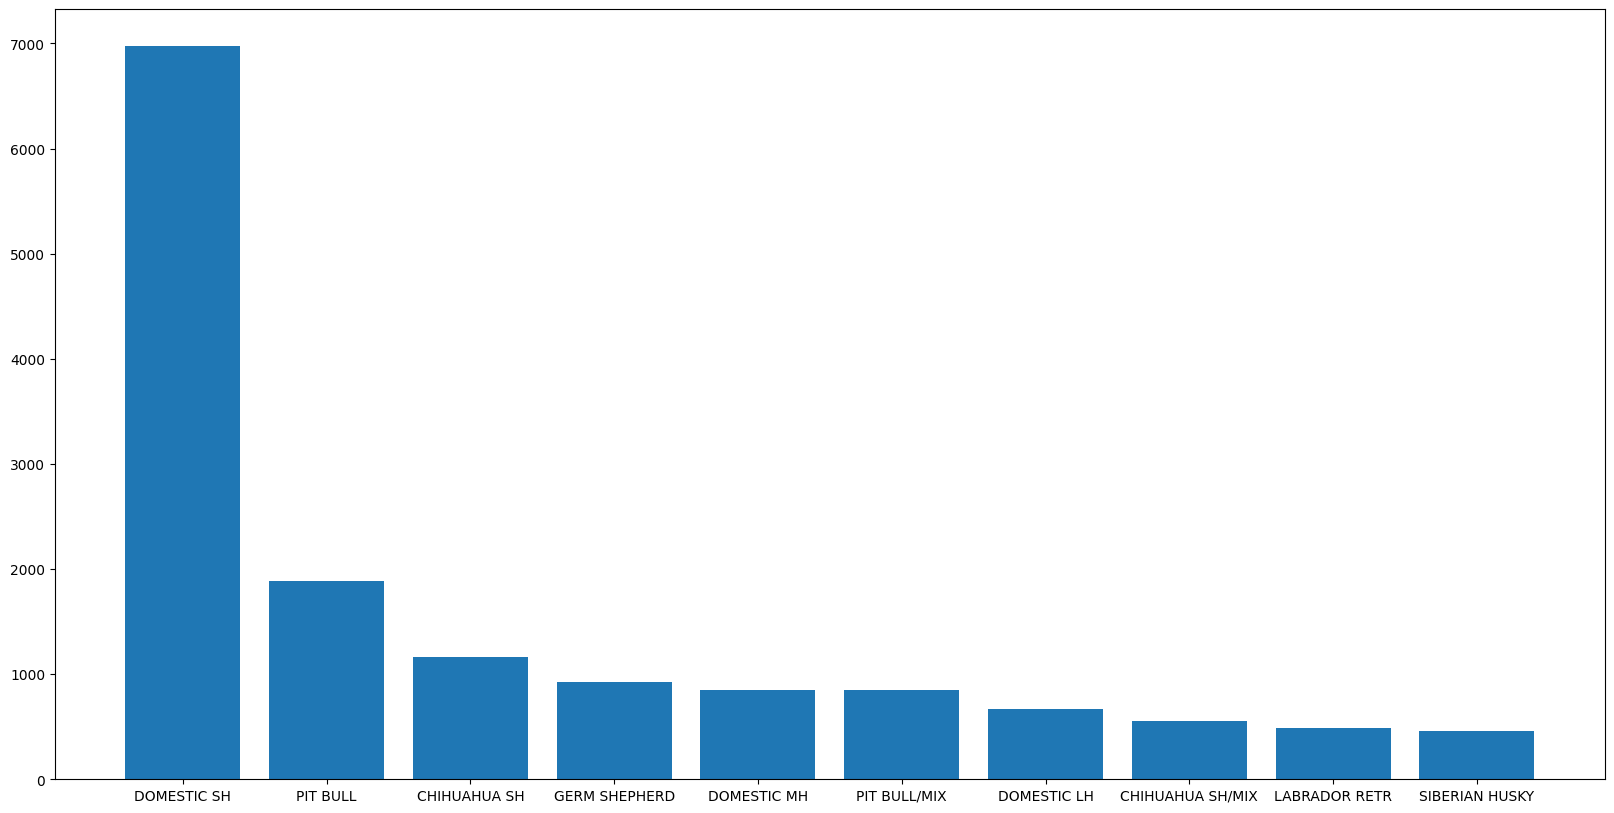

In [101]:
topTenBreeds = df["Breed"].value_counts().head(10)
topTenBreeds = topTenBreeds.to_dict()
plt.figure(figsize=(20,10))
plt.bar(topTenBreeds.keys(), topTenBreeds.values())
plt.show()

In [102]:
df["Sex"].unique()

array(['Neutered', 'Female', 'Unknown', 'Spayed', 'Male'], dtype=object)

In [103]:
# df = df.replace("Neutered", "Male")
# df = df.replace("Spayed", "Female")

In [104]:
df["Size"].unique()

array(['SMALL', 'MED', 'X-LRG', 'KITTN', 'LARGE', 'PUPPY', 'TOY', nan],
      dtype=object)

In [105]:
# df = df.replace("KITTN", "SMALL")
# df = df.replace("PUPPY", "SMALL")
# df = df.replace("TOY", "SMALL")
df = df.replace("MED", "MEDIUM")
# df = df.replace("X-LRG", "LARGE")
df['Size'] = df['Size'].fillna("MEDIUM")

In [106]:
df["Size"].unique()

array(['SMALL', 'MEDIUM', 'X-LRG', 'KITTN', 'LARGE', 'PUPPY', 'TOY'],
      dtype=object)

In [107]:
df.shape

(25435, 23)

In [108]:
sorted(df["Color"].unique())

['AGOUTI',
 'APRICOT',
 'APRICOT/WHITE',
 'BL BRINDLE',
 'BL BRINDLE/BLACK',
 'BL BRINDLE/GRAY',
 'BL BRINDLE/TAN',
 'BL BRINDLE/WHITE',
 'BLACK',
 'BLACK/BL BRINDLE',
 'BLACK/BLACK',
 'BLACK/BLK SMOKE',
 'BLACK/BLK TABBY',
 'BLACK/BLUE',
 'BLACK/BLUE MERLE',
 'BLACK/BLUE TICK',
 'BLACK/BR BRINDLE',
 'BLACK/BRN MERLE',
 'BLACK/BROWN',
 'BLACK/CHOCOLATE',
 'BLACK/CREAM',
 'BLACK/GOLD',
 'BLACK/GRAY',
 'BLACK/ORANGE',
 'BLACK/PURPLE',
 'BLACK/RED',
 'BLACK/SILVER',
 'BLACK/TAN',
 'BLACK/TRICOLOR',
 'BLACK/WHITE',
 'BLACK/YELLOW',
 'BLK SMOKE',
 'BLK SMOKE/WHITE',
 'BLK TABBY',
 'BLK TABBY/GRAY',
 'BLK TABBY/GRAY TIGER',
 'BLK TABBY/TORTIE',
 'BLK TABBY/WHITE',
 'BLK TIGER/GRAY',
 'BLK TIGER/TAN',
 'BLONDE',
 'BLUE',
 'BLUE CREAM',
 'BLUE CREAM/BRN TABBY',
 'BLUE CREAM/CALICO',
 'BLUE CREAM/TORTIE',
 'BLUE CREAM/WHITE',
 'BLUE MERLE',
 'BLUE MERLE/BLACK',
 'BLUE MERLE/GRAY',
 'BLUE MERLE/TAN',
 'BLUE MERLE/WHITE',
 'BLUE PT',
 'BLUE PT/WHITE',
 'BLUE TABBY',
 'BLUE TICK',
 'BLUE TICK/BLAC

In [109]:
len(df["Color"].unique())

340

In [110]:
def check_and_replace_color(colors):
    unique_colors = {}
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2:
            reversed_color = "/".join(reversed(parts))
            if reversed_color in unique_colors:
                unique_colors[color] = unique_colors[reversed_color]
            else:
                unique_colors[color] = color
        else:
            unique_colors[color] = color
    
    updated_colors = [unique_colors[color] for color in colors]
    return updated_colors

In [111]:
def replace_same_colors(colors):
    updated_colors = []
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2 and parts[0] == parts[1]:
            updated_colors.append(parts[0])
        else:
            updated_colors.append(color)
    
    return updated_colors

In [112]:
not_fixed_colors = df["Color"].copy()
df["Color"] = check_and_replace_color(df["Color"])
df["Color"] = replace_same_colors(df["Color"])

In [113]:
len(not_fixed_colors.unique())

In [114]:
len(df["Color"].unique())

340

In [115]:
# colors = df["Color"].value_counts()
# colors[colors < 20]
# df["Color"] = df["Color"].apply(lambda x: "OTHER" if x in colors[colors < 20] else x)

In [116]:
# unique_colors_before = not_fixed_colors.unique()
# unique_colors_after = df["Color"].unique()

In [117]:
# diff = len(unique_colors_before) - len(unique_colors_after)

# tmp = list(unique_colors_after)
# for i in range(diff):
#     tmp.append(0)
    
# unique_colors_after = np.asarray(tmp)

# data = {
#     "Before": unique_colors_before,
#     "After": unique_colors_after
# }

# df_for_colors_check = pd.DataFrame(data)
# df_for_colors_check
# df_for_colors_check.to_csv("./test_data/test.csv")

In [118]:
df["Intake Condition"].unique()

array(['UNKNOWN', 'HEALTHY', 'TREATABLE/MANAGEABLE', 'TREATABLE/REHAB',
       'UNTREATABLE'], dtype=object)

In [119]:
# df = df.replace("TREATABLE/MANAGEABLE", "TREATABLE")
# df = df.replace("TREATABLE/REHAB", "TREATABLE")

In [120]:
df[df["Days in Shelter"].str.contains(",")]

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Outcome Date,...,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Count,Latitude,Longitude
18320,CHARLIE,DOG,GOLDEN RETR,GOLD,Neutered,LARGE,10/27/2014,FREEZER,05/07/2018,09/27/2021,...,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,COUNTY,94952.0,1,38.23262,-122.64426


In [121]:
df['Days in Shelter'] = df['Days in Shelter'].str.replace(',', '')

In [122]:
df[df["Days in Shelter"].str.contains(",")]

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Outcome Date,...,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Count,Latitude,Longitude


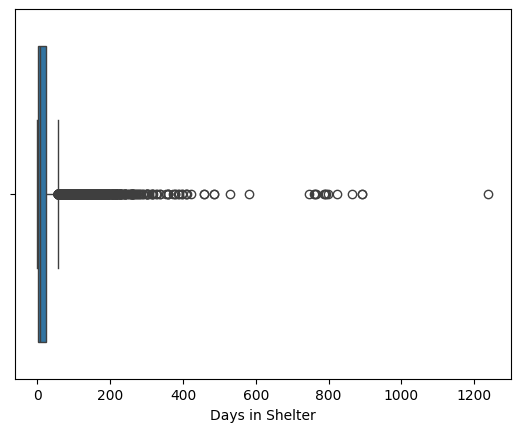

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Days in Shelter"] = df["Days in Shelter"].astype(float)
sns.boxplot(x=df["Days in Shelter"])
plt.show()


In [124]:
df[df["Days in Shelter"] > 50].count()

Name                    1947
Type                    2100
Breed                   2100
Color                   2100
Sex                     2100
Size                    2100
Date Of Birth           1909
Kennel Number           2100
Intake Date             2100
Outcome Date            2100
Days in Shelter         2100
Intake Type             2100
Intake Subtype          2100
Outcome Type            2099
Outcome Subtype         2071
Intake Condition        2100
Outcome Condition       2089
Intake Jurisdiction     2100
Outcome Jurisdiction    1923
Outcome Zip Code        1915
Count                   2100
Latitude                1870
Longitude               1870
dtype: int64

In [125]:
# df.drop(df[df["Days in Shelter"] > 50].index, inplace=True)
# df

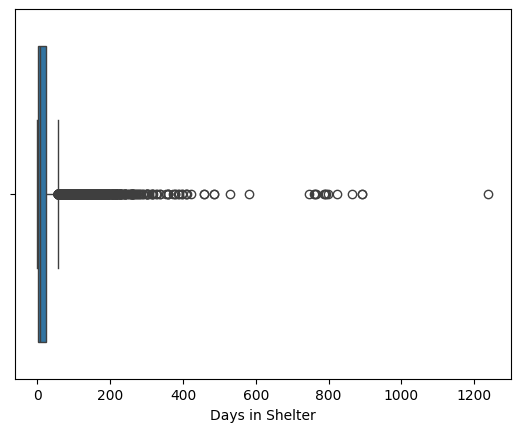

In [126]:
sns.boxplot(x=df["Days in Shelter"])
plt.show()

In [127]:
df.isnull().sum()

Name                    6670
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                       0
Date Of Birth           6329
Kennel Number             30
Intake Date                0
Outcome Date             211
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             217
Outcome Subtype          537
Intake Condition           0
Outcome Condition        564
Intake Jurisdiction        0
Outcome Jurisdiction    3668
Outcome Zip Code        3724
Count                      0
Latitude                4006
Longitude               4006
dtype: int64

In [128]:
from datetime import datetime

df.dropna(subset=['Date Of Birth'], inplace=True)
intake_date = pd.to_datetime(df["Intake Date"])
df["Date Of Birth"] = pd.to_datetime(df["Date Of Birth"])
df['Age'] = (intake_date - df['Date Of Birth']).dt.days.astype(int)//365
#df.drop(['Date Of Birth'], axis=1, inplace=True)
df

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Outcome Date,...,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Count,Latitude,Longitude,Age
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,2009-10-29,TRUCK,12/26/2022,12/26/2022,...,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,1,38.43807,-122.71247,13
4,CHLOE,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,2022-05-18,DS62,05/18/2023,05/21/2023,...,WONDER,UNKNOWN,HEALTHY,COUNTY,COUNTY,94951.0,1,38.29715,-122.66645,1
6,MAX,DOG,BORDER COLLIE,BLACK/TRICOLOR,Neutered,MEDIUM,2020-03-10,DS80,03/15/2023,03/15/2023,...,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95472.0,1,38.40179,-122.82512,3
7,NaN,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,2011-06-26,VET,12/23/2022,12/27/2022,...,DOA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95403.0,1,38.51311,-122.75502,11
8,OSO,DOG,LABRADOR RETR,BROWN,Neutered,X-LRG,2006-06-28,RECEIVING,04/29/2016,04/29/2016,...,OVER THE COUNTER_MCHIP,HEALTHY,HEALTHY,*WINDSOR,COUNTY,95436.0,1,38.47569,-122.89487,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25429,NaN,DOG,AUST CATTLE DOG,TAN/BLACK,Unknown,PUPPY,2022-02-21,CS04,02/24/2022,02/26/2022,...,HDBQ,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,OUT OF COUNTY,94044.0,1,37.63527,-122.492,0
25430,BUBA,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,2017-10-15,CA02,10/03/2019,10/23/2019,...,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,*HEALDSBURG,95448.0,1,38.61064,-122.86883,1
25431,JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,2017-11-08,CA01,06/20/2018,10/10/2018,...,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,1,38.41483,-122.72707,0
25432,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,2012-12-22,DS70,09/11/2014,10/02/2014,...,AGGRESSIVE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,95476.0,1,38.29188,-122.45728,1


In [129]:
df["Age"].unique()

array([13,  1,  3, 11,  9,  0,  7, 15, 10,  5,  2, 12,  6,  4, 16,  8, -1,
       14, 21, 19, -3, 20, 18, 22, -2, 17, 24, 23, 25, 30, -4])

In [130]:
df[df["Age"] < 0][["Intake Date", "Date Of Birth"]]

,Intake Date,Date Of Birth
160,09/13/2022,2022-09-21
215,06/27/2019,2020-03-23
891,11/04/2016,2019-04-14
1234,03/09/2019,2020-03-07
1335,01/22/2020,2020-05-09
1904,12/29/2013,2015-12-07
2580,09/13/2022,2022-09-21
5569,07/25/2014,2014-07-27
5813,09/07/2022,2022-09-21
5823,09/07/2022,2022-09-21


In [131]:
df.drop(df[df["Age"] < 0].index, inplace=True)

In [132]:
df.drop(['Date Of Birth'], axis=1, inplace=True)

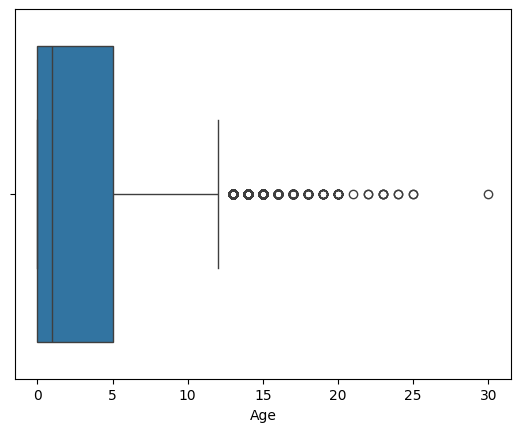

In [133]:
sns.boxplot(x=df["Age"])
plt.show()

In [134]:
df.drop(df[df["Age"] > 25].index, inplace=True)

In [135]:
# df.drop(df[df["Sex"] == "Unknown"].index, inplace=True)
# df

In [136]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'HAVANA/MIX', 'GUINEA PIG', 'LOP-AMER FUZZY',
       'HAMSTER', 'SATIN', 'CALIFORNIAN/MIX', 'ENGLISH SPOT',
       'LOP-HOLLAND/MIX', 'CHECKERED GIANT', 'BELGIAN HARE/MIX',
       'ENGLISH SPOT/MIX', 'DWARF HOTOT', 'PIGEON', 'REX', 'SHEEP',
       'PARAKEET', 'SHETLAND', 'CHICKEN', 'POTBELLY PIG', 'AMERICAN',
       'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX', 'REX/MIX', 'LOP-MINI',
       'NETHERLND DWARF', 'GOAT', 'JERSEY', 'DUTCH', 'HORSE', 'ANGUS',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'RAT', 'LILAC', 'HARLEQUIN/MIX',
       'LOP-FRENCH', 'SILVER', 'HAVANA', 'GOAT/LA MANCHA',
       'NEW ZEALAND WHT/MIX', 'AMERICAN/REX', 'THOROUGHBRED',
       'RHINELANDER/MIX', 'SILVER/MIX', 'HOTOT', 'ANGORA-SATIN', 'DUCK',
       'ANGORA-ENGLISH', 'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'NEW ZEALAND WHT', 'LOP-ENGLISH',
       'HIMALAYAN/MIX', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX

In [137]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "PALOMINO/MIX"), "Breed"] = "PALOMINO"

In [138]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'HAVANA/MIX', 'GUINEA PIG', 'LOP-AMER FUZZY',
       'HAMSTER', 'SATIN', 'CALIFORNIAN/MIX', 'ENGLISH SPOT',
       'LOP-HOLLAND/MIX', 'CHECKERED GIANT', 'BELGIAN HARE/MIX',
       'ENGLISH SPOT/MIX', 'DWARF HOTOT', 'PIGEON', 'REX', 'SHEEP',
       'PARAKEET', 'SHETLAND', 'CHICKEN', 'POTBELLY PIG', 'AMERICAN',
       'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX', 'REX/MIX', 'LOP-MINI',
       'NETHERLND DWARF', 'GOAT', 'JERSEY', 'DUTCH', 'HORSE', 'ANGUS',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'RAT', 'LILAC', 'HARLEQUIN/MIX',
       'LOP-FRENCH', 'SILVER', 'HAVANA', 'GOAT/LA MANCHA',
       'NEW ZEALAND WHT/MIX', 'AMERICAN/REX', 'THOROUGHBRED',
       'RHINELANDER/MIX', 'SILVER/MIX', 'HOTOT', 'ANGORA-SATIN', 'DUCK',
       'ANGORA-ENGLISH', 'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'NEW ZEALAND WHT', 'LOP-ENGLISH',
       'HIMALAYAN/MIX', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX

In [139]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("MIX")), "Breed"] = "MIX"

In [140]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'HAVANA/MIX', 'GUINEA PIG', 'LOP-AMER FUZZY',
       'HAMSTER', 'SATIN', 'CALIFORNIAN/MIX', 'ENGLISH SPOT',
       'LOP-HOLLAND/MIX', 'CHECKERED GIANT', 'BELGIAN HARE/MIX',
       'ENGLISH SPOT/MIX', 'DWARF HOTOT', 'PIGEON', 'REX', 'SHEEP',
       'PARAKEET', 'SHETLAND', 'CHICKEN', 'POTBELLY PIG', 'AMERICAN',
       'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX', 'REX/MIX', 'LOP-MINI',
       'NETHERLND DWARF', 'GOAT', 'JERSEY', 'DUTCH', 'HORSE', 'ANGUS',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'RAT', 'LILAC', 'HARLEQUIN/MIX',
       'LOP-FRENCH', 'SILVER', 'HAVANA', 'GOAT/LA MANCHA',
       'NEW ZEALAND WHT/MIX', 'AMERICAN/REX', 'THOROUGHBRED',
       'RHINELANDER/MIX', 'SILVER/MIX', 'HOTOT', 'ANGORA-SATIN', 'DUCK',
       'ANGORA-ENGLISH', 'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'NEW ZEALAND WHT', 'LOP-ENGLISH',
       'HIMALAYAN/MIX', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX

In [141]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("GOAT")), "Breed"] = "GOAT"

In [142]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'HAVANA/MIX', 'GUINEA PIG', 'LOP-AMER FUZZY',
       'HAMSTER', 'SATIN', 'CALIFORNIAN/MIX', 'ENGLISH SPOT',
       'LOP-HOLLAND/MIX', 'CHECKERED GIANT', 'BELGIAN HARE/MIX',
       'ENGLISH SPOT/MIX', 'DWARF HOTOT', 'PIGEON', 'REX', 'SHEEP',
       'PARAKEET', 'SHETLAND', 'CHICKEN', 'POTBELLY PIG', 'AMERICAN',
       'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX', 'REX/MIX', 'LOP-MINI',
       'NETHERLND DWARF', 'GOAT', 'JERSEY', 'DUTCH', 'HORSE', 'ANGUS',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'RAT', 'LILAC', 'HARLEQUIN/MIX',
       'LOP-FRENCH', 'SILVER', 'HAVANA', 'GOAT/LA MANCHA',
       'NEW ZEALAND WHT/MIX', 'AMERICAN/REX', 'THOROUGHBRED',
       'RHINELANDER/MIX', 'SILVER/MIX', 'HOTOT', 'ANGORA-SATIN', 'DUCK',
       'ANGORA-ENGLISH', 'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'NEW ZEALAND WHT', 'LOP-ENGLISH',
       'HIMALAYAN/MIX', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX

In [143]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "AMERICAN/REX"), "Breed"] = "MIX"

In [144]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

array(['PIG', 'RABBIT SH', 'HAVANA/MIX', 'GUINEA PIG', 'LOP-AMER FUZZY',
       'HAMSTER', 'SATIN', 'CALIFORNIAN/MIX', 'ENGLISH SPOT',
       'LOP-HOLLAND/MIX', 'CHECKERED GIANT', 'BELGIAN HARE/MIX',
       'ENGLISH SPOT/MIX', 'DWARF HOTOT', 'PIGEON', 'REX', 'SHEEP',
       'PARAKEET', 'SHETLAND', 'CHICKEN', 'POTBELLY PIG', 'AMERICAN',
       'RABBIT LH', 'JERSEY/MIX', 'LOP-MINI/MIX', 'REX/MIX', 'LOP-MINI',
       'NETHERLND DWARF', 'GOAT', 'JERSEY', 'DUTCH', 'HORSE', 'ANGUS',
       'COCKATIEL', 'LOP-AMER FUZZY/MIX', 'RAT', 'LILAC', 'HARLEQUIN/MIX',
       'LOP-FRENCH', 'SILVER', 'HAVANA', 'GOAT/LA MANCHA',
       'NEW ZEALAND WHT/MIX', 'AMERICAN/REX', 'THOROUGHBRED',
       'RHINELANDER/MIX', 'SILVER/MIX', 'HOTOT', 'ANGORA-SATIN', 'DUCK',
       'ANGORA-ENGLISH', 'DUTCH/MIX', 'BOER', 'HOTOT/MIX', 'CALIFORNIAN',
       'NETHERLND DWARF/MIX', 'NEW ZEALAND WHT', 'LOP-ENGLISH',
       'HIMALAYAN/MIX', 'PALOMINO', 'FLORIDA WHITE', 'LOP-HOLLAND',
       'LOP-ENGLISH/MIX', 'ANGORA-SATIN/MIX

In [145]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(["RABBIT SH", "RABBIT LH"])), "Breed"] = "RABBIT"

In [146]:
# rabbit_breeds = ["LOP-AMER FUZZY",
#                     "LOP-HOLLAND",
#                     "RABBIT",
#                     "DWARF HOTOT",
#                     "MIX",
#                     "REX",
#                     "LOP-MINI",
#                     "LOP-FRENCH",
#                     "SILVER",
#                     "HOTOT",
#                     "ANGORA-ENGLISH",
#                     "DUTCH",
#                     "AMERICAN",
#                     "CALIFORNIAN",
#                     "LOP-ENGLISH",
#                     "ENGLISH SPOT"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(rabbit_breeds)), "Breed"] = "RABBIT"

# roden_breeds = ["GUINEA PIG",
#                 "HAMSTER",
#                 "RAT",
#                 "MOUSE"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(roden_breeds)), "Breed"] = "RODENT"

# live_stock_breeds = ["GOAT",
#                     "CHICKEN",
#                     "SHEEP",
#                     "BOER",
#                     "BARRED ROCK"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(live_stock_breeds)), "Breed"] = "LIVESTOCK"

# bird_breeds = ["PARAKEET",
#                 "COCKATIEL",
#                 "CANARY",
#                 "DOVE"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(bird_breeds)), "Breed"] = "BIRD"

# horse_breeds = ["HORSE",
#                 "SHETLAND",
#                 "PALOMINO"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(horse_breeds)), "Breed"] = "HORSE"

# if "RACCOON" in df["Breed"].values:
#     df.loc[df["Breed"] == "RACCOON", "Type"] = "RACCOON"

In [147]:
dog_types = df[df["Type"] == "DOG"]
sorted(dog_types["Breed"].unique())

['AFFENPINSCHER',
 'AFFENPINSCHER/MIX',
 'AIREDALE TERR',
 'AIREDALE TERR/MIX',
 'AKBASH',
 'AKBASH/GREAT PYRENEES',
 'AKBASH/MIX',
 'AKITA',
 'AKITA/ALASKAN HUSKY',
 'AKITA/ANATOL SHEPHERD',
 'AKITA/CHOW CHOW',
 'AKITA/GERM SHEPHERD',
 'AKITA/LABRADOR RETR',
 'AKITA/MIX',
 'AKITA/PIT BULL',
 'ALASK KLEE KAI',
 'ALASK MALAMUTE',
 'ALASK MALAMUTE/MIX',
 'ALASK MALAMUTE/SIBERIAN HUSKY',
 'ALASKAN HUSKY',
 'ALASKAN HUSKY/AUST SHEPHERD',
 'ALASKAN HUSKY/BEAGLE',
 'ALASKAN HUSKY/BORDER COLLIE',
 'ALASKAN HUSKY/GERM SHEPHERD',
 'ALASKAN HUSKY/LABRADOR RETR',
 'ALASKAN HUSKY/MIX',
 'ALASKAN HUSKY/PIT BULL',
 'ALASKAN HUSKY/SHIBA INU',
 'AM PIT BULL TER',
 'AM PIT BULL TER/BULLDOG',
 'AM PIT BULL TER/LABRADOR RETR',
 'AM PIT BULL TER/MIX',
 'AM PIT BULL TER/RHOD RIDGEBACK',
 'AMER BULLDOG',
 'AMER BULLDOG/AM PIT BULL TER',
 'AMER BULLDOG/BOXER',
 'AMER BULLDOG/DOGO ARGENTINO',
 'AMER BULLDOG/MIX',
 'AMER BULLDOG/PIT BULL',
 'AMER ESKIMO',
 'AMER ESKIMO/MIX',
 'AMER ESKIMO/POMERANIAN',
 'AMER F

In [148]:
len(dog_types["Breed"].unique())

803

In [149]:
# df.loc[(df["Type"] == "DOG") & (df["Breed"].str.contains("/")), "Breed"] = "MIX"

In [150]:
dog_types = df[df["Type"] == "DOG"]
len(dog_types["Breed"].unique())

803

In [151]:
df.isnull().sum()

Name                    2641
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                       0
Kennel Number             28
Intake Date                0
Outcome Date             178
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             178
Outcome Subtype          330
Intake Condition           0
Outcome Condition        315
Intake Jurisdiction        0
Outcome Jurisdiction    1808
Outcome Zip Code        1836
Count                      0
Latitude                2054
Longitude               2054
Age                        0
dtype: int64

In [152]:
# df.drop(df[df["Type"] == "OTHER"].index, inplace=True)

In [153]:
breed_counts = df["Breed"].value_counts() 
breed_counts

Breed
DOMESTIC SH                     5114
PIT BULL                        1528
CHIHUAHUA SH                     980
GERM SHEPHERD                    726
PIT BULL/MIX                     703
                                ... 
KANGAL                             1
AUST CATTLE DOG/AUST KELPIE        1
WELSH CORGI PEM/CHIHUAHUA SH       1
TERRIER & MIX                      1
POMERANIAN/YORKSHIRE TERR          1
Name: count, Length: 936, dtype: int64

In [154]:
# df = df[~df["Breed"].isin(breed_counts[breed_counts < 20].index)]

In [155]:
df["Breed"].value_counts() 

Breed
DOMESTIC SH                     5114
PIT BULL                        1528
CHIHUAHUA SH                     980
GERM SHEPHERD                    726
PIT BULL/MIX                     703
                                ... 
KANGAL                             1
AUST CATTLE DOG/AUST KELPIE        1
WELSH CORGI PEM/CHIHUAHUA SH       1
TERRIER & MIX                      1
POMERANIAN/YORKSHIRE TERR          1
Name: count, Length: 936, dtype: int64

In [156]:
df["Days in Shelter"]

0          0.0
4          3.0
6          0.0
7          4.0
8          0.0
         ...  
25429      2.0
25430     20.0
25431    112.0
25432     21.0
25433     49.0
Name: Days in Shelter, Length: 19073, dtype: float64

## Removal

In [158]:
df["Outcome Date"] = pd.to_datetime(df["Outcome Date"])

In [159]:
# #TMP

# df['Outcome Date'] = pd.to_datetime(df['Outcome Date'])


In [160]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()

df = df.apply(encoder.fit_transform)
df

,Name,Type,Breed,Color,Sex,Size,Kennel Number,Intake Date,Outcome Date,Days in Shelter,...,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Latitude,Longitude,Age
0,3783,1,184,23,2,4,150,3110,2590,0,...,5,54,3,1,11,10,390,316,442,13
4,922,1,845,23,0,4,97,1235,2703,3,...,7,207,3,1,9,8,331,288,427,1
6,2883,1,162,22,2,2,115,658,2651,0,...,5,139,3,2,9,8,441,303,462,3
7,5043,0,368,164,3,4,152,3089,2591,4,...,2,38,3,0,9,10,389,341,452,11
8,3389,1,524,84,2,6,146,1058,730,0,...,5,143,0,1,8,8,411,331,476,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25429,5043,1,66,213,4,3,10,483,2363,2,...,7,70,2,4,11,9,199,162,392,0
25430,617,0,376,164,2,4,2,2404,1749,20,...,0,198,0,1,11,2,420,363,469,1
25431,2164,2,48,256,3,4,1,1518,1449,112,...,7,77,0,1,11,8,393,308,446,0
25432,4174,1,666,225,2,1,105,2214,235,21,...,4,5,4,5,11,8,442,287,383,1


In [ ]:
decision = df["Days in Shelter"]
attributes = df.drop("Days in Shelter", axis=1)

In [ ]:
attributes

In [ ]:
decision

In [ ]:
attributes.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_attributes = scaler.fit_transform(attributes)
scaled_attributes

In [ ]:
scaled_decision = scaler.fit_transform(decision.values.reshape(-1, 1))
scaled_decision

In [ ]:
test_df = pd.DataFrame(np.concatenate((scaled_attributes, scaled_decision), axis=1), columns=df.columns)
test_df
test_df.to_csv("./test_data/scaled_dataframe.csv")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(attributes, decision, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
scaled_X_train, scaled_X_temp, scaled_y_train, scaled_y_temp = train_test_split(scaled_attributes, decision, test_size=0.3, random_state=42)
scaled_X_val, scaled_X_test, scaled_y_val, scaled_y_test = train_test_split(scaled_X_temp, scaled_y_temp, test_size=0.5, random_state=42)

In [ ]:
def graph_for_model(y_val, y_pred, model_name):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_val, y_pred, c='b', marker='o', label='Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('MODEL - {model_name}'.format(model_name=model_name))
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.show()

Random forest

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from decimal import Decimal

model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)
y_pred_LinearRegression = model_LinearRegression.predict(X_val)
mae_LinearRegression = mean_absolute_error(scaled_y_val, y_pred_LinearRegression)
r2_LinearRegression = r2_score(scaled_y_val, y_pred_LinearRegression)

rounded_rmse_LinearRegression = round(mae_LinearRegression, 3)
rounded_r2_LinearRegression = round(r2_LinearRegression, 3)

print("Mean Absolute Error:", Decimal(str(rounded_rmse_LinearRegression)))
print("R^2 Score:", Decimal(str(rounded_r2_LinearRegression)))


In [ ]:
graph_for_model(scaled_y_val, y_pred_LinearRegression, "Linear Regression")

In [ ]:
from sklearn.linear_model import Ridge, Lasso, BayesianRidge

model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)
y_pred_Ridge = model_Ridge.predict(scaled_X_val)
mae_Ridge = mean_absolute_error(scaled_y_val, y_pred_Ridge)
r2_Ridge = r2_score(scaled_y_val, y_pred_Ridge)

rounded_rmse_Ridge = round(mae_Ridge, 3)
rounded_r2_Ridge = round(r2_Ridge, 3)

print("Mean Absolute Error:", Decimal(str(rounded_rmse_Ridge)))
print("R^2 Score:", Decimal(str(rounded_r2_Ridge)))

In [ ]:
graph_for_model(scaled_y_val, y_pred_Ridge, "Ridge")

In [ ]:
model_BayesianRidge = BayesianRidge()
model_BayesianRidge.fit(X_train, y_train)
y_pred_BayesianRidge = model_BayesianRidge.predict(scaled_X_val)
mae_BayesianRidge = mean_absolute_error(scaled_y_val, y_pred_BayesianRidge)
r2_BayesianRidge = r2_score(scaled_y_val, y_pred_BayesianRidge)

rounded_rmae_BayesianRidge = round(mae_BayesianRidge, 3)
rounded_r2_BayesianRidge = round(r2_BayesianRidge, 3)

print("Mean Absolute Error:", Decimal(str(rounded_rmae_BayesianRidge)))
print("R^2 Score:", Decimal(str(rounded_r2_BayesianRidge)))

In [ ]:
graph_for_model(scaled_y_val, y_pred_BayesianRidge, "BayesianRidge")

In [ ]:
from sklearn.svm import SVR

model_SVR = SVR(kernel="rbf")
model_SVR.fit(X_train, y_train)
y_pred_SVR = model_SVR.predict(scaled_X_val)
mae_SVR = mean_absolute_error(scaled_y_val, y_pred_SVR)
r2_SVR = r2_score(scaled_y_val, y_pred_SVR)

rounded_rmae_SVR = round(mae_SVR, 3)
rounded_r2_SVR = round(r2_SVR, 3)

print("Mean Absolute Error:", Decimal(str(rounded_rmae_SVR)))
print("R^2 Score:", Decimal(str(rounded_r2_SVR)))

In [ ]:
graph_for_model(scaled_y_val, y_pred_SVR, "SVR")

NN

In [ ]:
import optuna
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.regularizers import l2

def objective(trial):
    units_layer1 = trial.suggest_int('units_layer1', 32, 512)
    units_layer2 = trial.suggest_int('units_layer2', 32, 512)
    units_layer3 = trial.suggest_int('units_layer3', 32, 512)
    dropout_rate1 = trial.suggest_float('dropout_rate1', 0.1, 0.7)
    dropout_rate2 = trial.suggest_float('dropout_rate2', 0.1, 0.7)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'tanh', 'sigmoid'])
    activation3 = trial.suggest_categorical('activation3', ['relu', 'tanh', 'sigmoid'])
    kernel_initializer = trial.suggest_categorical('kernel_initializer', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_initializer2 = trial.suggest_categorical('kernel_initializer2', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_initializer3 = trial.suggest_categorical('kernel_initializer3', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_regularizer_value = trial.suggest_float('kernel_regularizer_value', 0.01, 0.1)
    kernel_regularizer_value2 = trial.suggest_float('kernel_regularizer_value2', 0.01, 0.1)
    kernel_regularizer_value3 = trial.suggest_float('kernel_regularizer_value3', 0.01, 0.1)

    model = tf.keras.models.Sequential([
        Dense(units_layer1, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=l2(kernel_regularizer_value), input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate1),
        Dense(units_layer2, activation=activation2, kernel_initializer=kernel_initializer2, kernel_regularizer=l2(kernel_regularizer_value2)),
        Dropout(dropout_rate2),
        Dense(units_layer3, activation=activation3, kernel_initializer=kernel_initializer3, kernel_regularizer=l2(kernel_regularizer_value3)),
        Dense(1)
    ])

    model.compile(optimizer='nadam', metrics=["mae"], loss='mse')

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    result = model.evaluate(X_val, y_val, verbose=0)

    return result[0]


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


In [ ]:
units_layer1 = trial.params['units_layer1']
units_layer2 = trial.params['units_layer2']
dropout_rate1 = trial.params['dropout_rate1']
dropout_rate2 = trial.params['dropout_rate2']
activation = trial.params['activation']
activation2 = trial.params['activation2']
kernel_initializer = trial.params['kernel_initializer']
kernel_initializer2 = trial.params['kernel_initializer2']
kernel_regularizer_value = trial.params['kernel_regularizer_value']
kernel_regularizer_value2 = trial.params['kernel_regularizer_value2']

initializer = tf.keras.initializers.GlorotUniform() 

model = tf.keras.models.Sequential([
        Dense(units_layer1, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=l2(kernel_regularizer_value), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate1),
        Dense(units_layer2, activation=activation2, kernel_initializer=kernel_initializer2, kernel_regularizer=l2(kernel_regularizer_value2)),
        BatchNormalization(),
        Dropout(dropout_rate2),
        Dense(1)
    ])

model.compile(optimizer='nadam', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score()], loss='mae')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

model.evaluate(X_val, y_test, verbose=0)

In [ ]:
final_epochs = len(history.epoch)

In [ ]:
history.history.keys()

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(1, final_epochs + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['root_mean_squared_error'], label='Training RMSE')
# plt.plot(epochs_range, history.history['val_mse'], label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')

plt.show()


In [ ]:
y_pred = model.predict(X_test)

y_pred

In [ ]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(df_pred.to_string(index=False))

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(y_test, y_pred, c='b', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.plot(y_test, y_test, 'r-', linewidth=2)
plt.show()

In [ ]:
import os

folder_path = "./test_data"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Usunięto plik: {filename}")
    except Exception as e:
        print(f"Błąd podczas usuwania pliku {filename}: {e}")

In [ ]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer